In [1]:
import pandas as pd 

In [2]:
df=pd.read_csv('../outlier_check/weight-height.csv')

In [66]:
df.head
df.isnull()

Gender  Height  Weight
1      False   False   False
2      False   False   False
3      False   False   False
4      False   False   False
5      False   False   False
...      ...     ...     ...
9995   False   False   False
9996   False   False   False
9997   False   False   False
9998   False   False   False
9999   False   False   False

[9873 rows x 3 columns]

In [36]:
q1=df['Height'].quantile(0.25)
q3=df['Height'].quantile(0.75)
print(q1)
print(q3)

63.5540062799711
69.15202054727813


In [37]:
df.Height

1       68.781904
2       74.110105
3       71.730978
4       69.881796
5       67.253016
          ...    
9995    66.172652
9996    67.067155
9997    63.867992
9998    69.034243
9999    61.944246
Name: Height, Length: 9882, dtype: float64

In [38]:
IQR = q3-q1
print(IQR)

5.598014267307029


In [39]:
lower_limit = q1-1.5*IQR
upper_limit = q3+1.5*IQR

In [40]:
 df[(df.Height>lower_limit) & (df.Height<upper_limit)]

Gender     Height      Weight
1       Male  68.781904  162.310473
2       Male  74.110105  212.740856
3       Male  71.730978  220.042470
4       Male  69.881796  206.349801
5       Male  67.253016  152.212156
...      ...        ...         ...
9995  Female  66.172652  136.777454
9996  Female  67.067155  170.867906
9997  Female  63.867992  128.475319
9998  Female  69.034243  163.852461
9999  Female  61.944246  113.649103

[9882 rows x 3 columns]

In [41]:
male = df[df['Gender']=='Male']
male.shape

(4930, 3)

In [42]:
male.head

<bound method NDFrame.head of      Gender     Height      Weight
1      Male  68.781904  162.310473
2      Male  74.110105  212.740856
3      Male  71.730978  220.042470
4      Male  69.881796  206.349801
5      Male  67.253016  152.212156
...     ...        ...         ...
4995   Male  68.860062  177.131052
4996   Male  68.973423  159.285228
4997   Male  67.013795  199.195400
4998   Male  71.557718  185.905909
4999   Male  70.351880  198.903012

[4930 rows x 3 columns]>

In [43]:
Q1 = male.Height.quantile(0.25)
print(Q1)

67.1976729941022


In [44]:
Q3 = male.Height.quantile(0.75)
print(Q3)

70.96676332718437


In [45]:
IQRM = Q3-Q1
lower_limit_male = Q1-1.5*IQRM
upper_limit_male = Q3+1.5*IQRM
male=male[(male['Height']>lower_limit_male) &  (male['Height']<upper_limit_male)]


In [46]:
male

Gender     Height      Weight
1      Male  68.781904  162.310473
2      Male  74.110105  212.740856
3      Male  71.730978  220.042470
4      Male  69.881796  206.349801
5      Male  67.253016  152.212156
...     ...        ...         ...
4995   Male  68.860062  177.131052
4996   Male  68.973423  159.285228
4997   Male  67.013795  199.195400
4998   Male  71.557718  185.905909
4999   Male  70.351880  198.903012

[4925 rows x 3 columns]

In [47]:
import matplotlib.pyplot as plt 
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

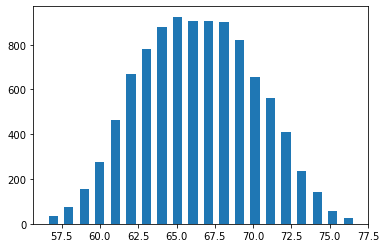

In [48]:
plt.hist(df['Height'],bins=20,rwidth=0.6)
plt.show

In [49]:
Q1 = male.Height.quantile(0.25)
Q3 = male.Height.quantile(0.75)

In [50]:
df_male=df[(df['Gender']=='Male')]
df_male.shape

(4930, 3)

In [51]:
Q3=df_male.Height.quantile(0.75)
Q1=df_male.Height.quantile(0.25)
max_threshold=Q3+1.5*(Q3-Q1)
min_threshold=Q1-1.5*(Q3-Q1)
df_male=df_male[(df_male['Height']<=max_threshold) &( df_male['Height']>=min_threshold)]
Q3=df_male.Weight.quantile(0.75)
Q1=df_male.Weight.quantile(0.25)
max_threshold=Q3+1.5*(Q3-Q1)
min_threshold=Q1-1.5*(Q3-Q1)
df_male=df_male[(df_male['Weight']<=max_threshold) &( df_male['Weight']>=min_threshold)]
df_male.shape



(4923, 3)

In [52]:
Female = df[df['Gender']== 'Female']
Female.head

<bound method NDFrame.head of       Gender     Height      Weight
5000  Female  58.910732  102.088326
5001  Female  65.230013  141.305823
5002  Female  63.369004  131.041403
5003  Female  64.479997  128.171511
5004  Female  61.793096  129.781407
...      ...        ...         ...
9995  Female  66.172652  136.777454
9996  Female  67.067155  170.867906
9997  Female  63.867992  128.475319
9998  Female  69.034243  163.852461
9999  Female  61.944246  113.649103

[4952 rows x 3 columns]>

In [53]:
Q3 = Female.Height.quantile(0.75)
Q1 = Female.Height.quantile(0.25)
max_threshold = Q3+1.5*(Q3-Q1) 
min_threshold = Q1-1.5*(Q3-Q1)
Female = Female[(Female['Height']<max_threshold) & (Female['Height']>min_threshold)]
Q3 = Female.Weight.quantile(0.75)
Q1 = Female.Weight.quantile(0.25)
max_threshold = Q3+1.5*(Q3-Q1) 
min_threshold = Q1-1.5*(Q3-Q1)
Female = Female[(Female['Weight']<max_threshold) & (Female['Weight']>min_threshold)]
Female.shape

(4950, 3)

In [54]:
df = df_male.append(Female)
df.shape

(9873, 3)

In [69]:
X = df.drop(labels=['Gender'],axis =1)

In [70]:
X.shape

(9873, 2)

In [76]:
X.head

<bound method NDFrame.head of          Height      Weight
1     68.781904  162.310473
2     74.110105  212.740856
3     71.730978  220.042470
4     69.881796  206.349801
5     67.253016  152.212156
...         ...         ...
9995  66.172652  136.777454
9996  67.067155  170.867906
9997  63.867992  128.475319
9998  69.034243  163.852461
9999  61.944246  113.649103

[9873 rows x 2 columns]>

In [58]:
Y = df['Gender']

In [59]:
Y.head

<bound method NDFrame.head of 1         Male
2         Male
3         Male
4         Male
5         Male
         ...  
9995    Female
9996    Female
9997    Female
9998    Female
9999    Female
Name: Gender, Length: 9873, dtype: object>

In [60]:
from sklearn.preprocessing import LabelBinarizer


In [61]:
lb=LabelBinarizer()
Y=lb.fit_transform(Y)
Y

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

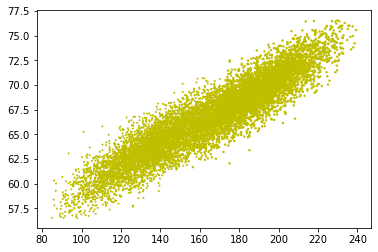

In [62]:

plt.scatter(X.Weight,X.Height,Y+1,c='y')
plt.show()

In [77]:

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X=ss.fit_transform(X)
X


array([[ 0.64184582,  0.02960987],
       [ 2.05775011,  1.62572192],
       [ 1.42552623,  1.85681664],
       ...,
       [-0.66396611, -1.04126633],
       [ 0.70890184,  0.07841352],
       [-1.17517815, -1.51051326]])

In [78]:

print(ss.mean_)
print(ss.var_)

[ 66.36656866 161.37492611]
[ 14.16098482 998.29243186]


In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size =0.25)

In [81]:
X_train.shape

(7404, 2)

In [82]:
Y_train.shape

(7404, 1)

In [83]:
X_test.shape

(2469, 2)